<center>
    <img src="https://www.clearlyrated.com/brand-logo/talent-path" width="500" alt="cognitiveclass.ai logo"  />
</center>

# Seaborn
[Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)

# Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

___
## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

## Data
Seaborn comes with built-in data sets!<br>
click [here](https://github.com/mwaskom/seaborn-data) for other datasets

In [2]:
tips = sns.load_dataset('tips')

In [4]:
## Display the first 5 rows
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## distplot

The distplot shows the distribution of a univariate set of observations.

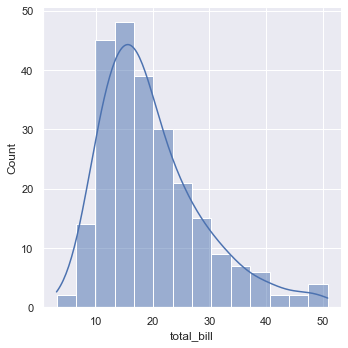

In [8]:
# Create a displot for the total_bill
sns.displot(tips['total_bill'],kde=True)

To remove the kde layer and just have the histogram use:

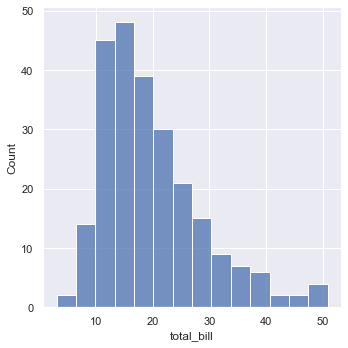

In [9]:
sns.displot(tips['total_bill'],kde=False)

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

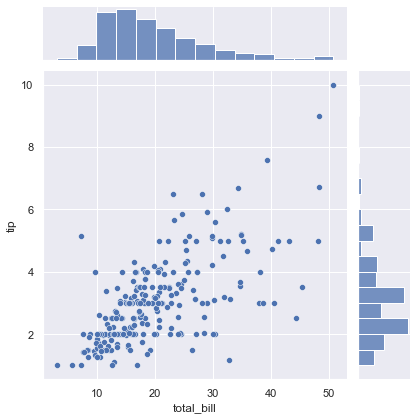

In [12]:
# Scatter
sns.jointplot(x='total_bill', y = 'tip', data=tips,kind='scatter')

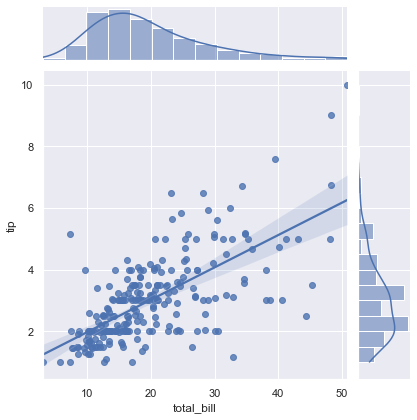

In [14]:
# reg
sns.jointplot(x='total_bill', y = 'tip', data=tips,kind='reg')

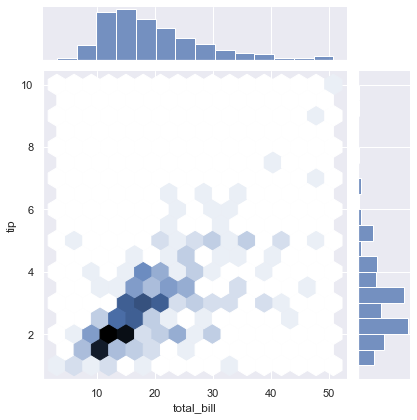

In [15]:
# hex
sns.jointplot(x='total_bill', y = 'tip', data=tips,kind='hex')

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

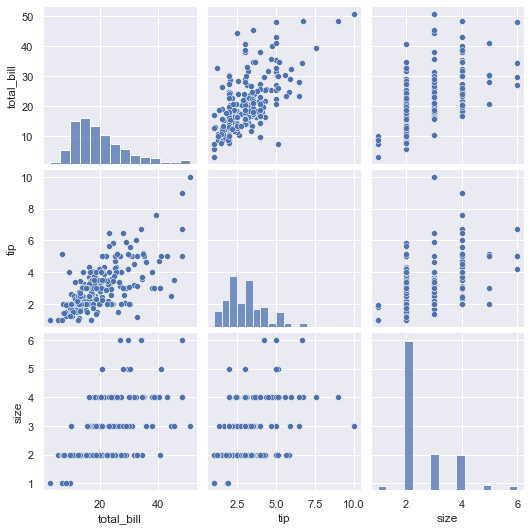

In [16]:
# Create a pairplot for the dataset
sns.pairplot(tips)

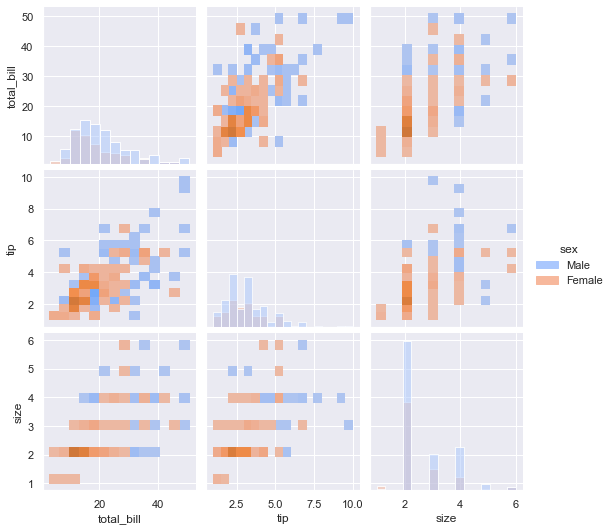

In [18]:
#customize pairplot with hue and palette
sns.pairplot(tips,hue='sex',palette='coolwarm',kind='hist')

## rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

<AxesSubplot:xlabel='total_bill'>

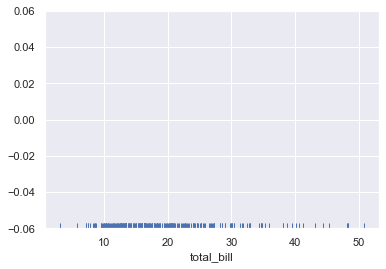

In [19]:
# Create a rugplot for total_bill
sns.rugplot(tips['total_bill'])

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

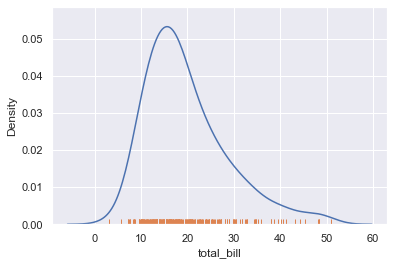

In [21]:
# Combined a kdeplot and rugplot for total_bill
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

<AxesSubplot:xlabel='tip', ylabel='Density'>

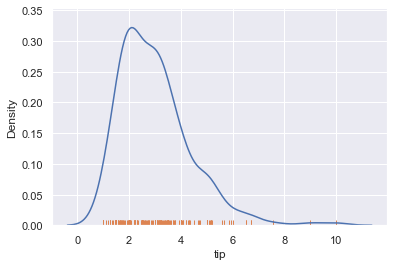

In [22]:
# Combined a kdeplot and rugplot for tip
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

# Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

Let's go through examples of each!

## barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

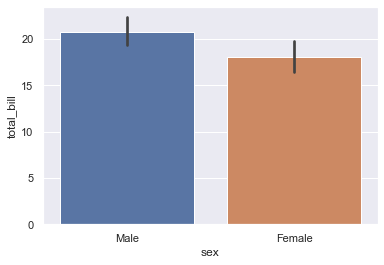

In [24]:
# Create barplot using Sex for x values and total bill for y values

sns.barplot(x='sex',y='total_bill', data=tips);

You can change the estimator object to your own function, that converts a vector to a scalar:

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

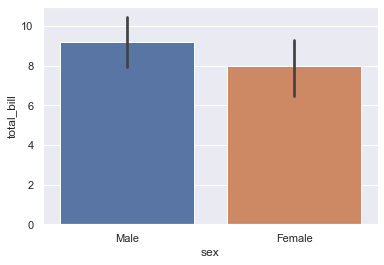

In [26]:
# Bar plot uses the mean
sns.barplot(x='sex',y='total_bill', data=tips,estimator=np.std)

### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

<AxesSubplot:xlabel='sex', ylabel='count'>

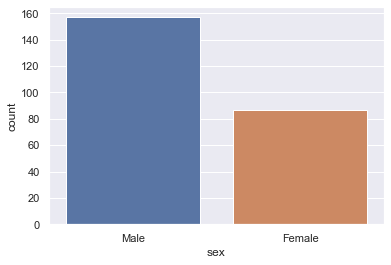

In [27]:
sns.countplot(x='sex', data=tips)

## boxplot and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

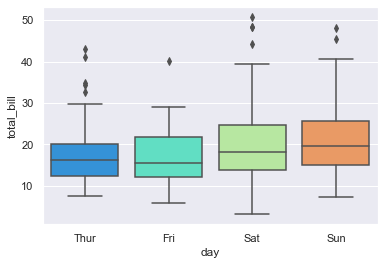

In [28]:
# Shows the dist of categorical data
# Dots represent outliers
# Line in the middle represent the mean
sns.boxplot(x='day',y='total_bill', data=tips, palette='rainbow')

<AxesSubplot:>

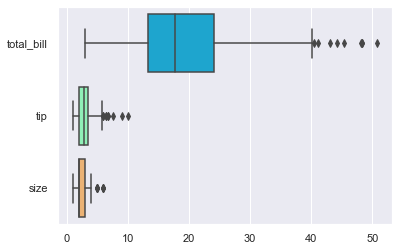

In [30]:
# Can do entire dataframe with orient='h'
sns.boxplot( data=tips, palette='rainbow', orient='h')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

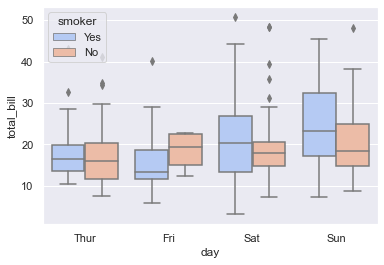

In [31]:
sns.boxplot(x='day',y='total_bill', data=tips, palette='coolwarm',hue='smoker')

### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

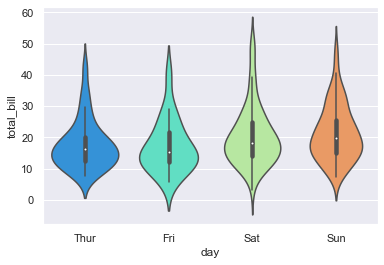

In [33]:
sns.violinplot(x='day', y='total_bill',data=tips,palette='rainbow')
# What is the insights of this?
# Same description of the box plot, it does not contain a display for outliers but it shows your min and max values
# https://www.tableau.com/solutions/gallery/visual-vocabulary

<AxesSubplot:xlabel='day', ylabel='total_bill'>

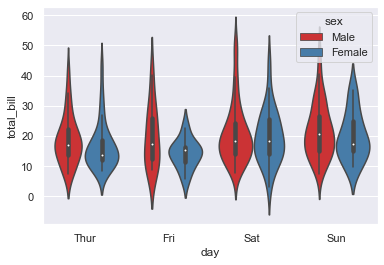

In [36]:
#Separates male and female
sns.violinplot(x='day', y='total_bill',data=tips, palette='Set1', hue='sex')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

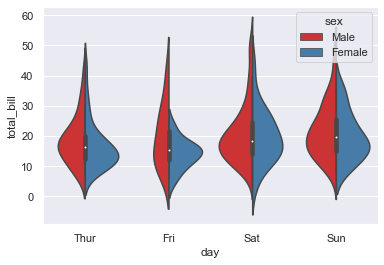

In [37]:
# Combine both
sns.violinplot(x='day', y='total_bill',data=tips, palette='Set1', hue='sex', split=True)

## stripplot and swarmplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).ipynb_checkpoints

<AxesSubplot:xlabel='day', ylabel='total_bill'>

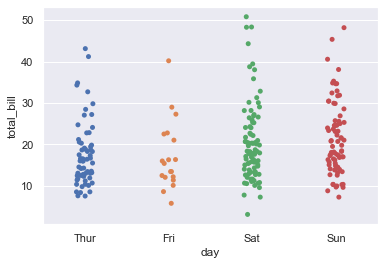

In [38]:
# One variable is categorial and one numerical
sns.stripplot(x='day',y='total_bill',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

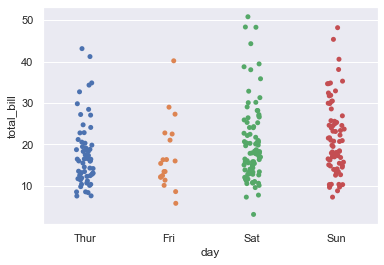

In [40]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True)
# It tries to realign the data points to make them more straight line

<AxesSubplot:xlabel='day', ylabel='total_bill'>

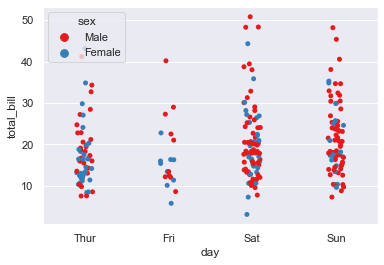

In [53]:
sns.stripplot(x='day',y='total_bill',data=tips, hue='sex',palette='Set1')
# Changes location when rerun?

C:\Users\RSanchez\Anaconda3\lib\site-packages\seaborn\categorical.py:2802: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='day', ylabel='total_bill'>

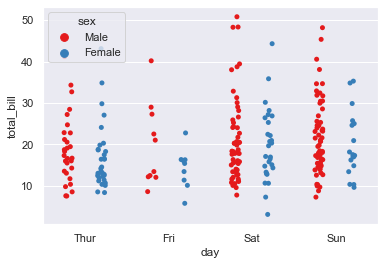

In [54]:
sns.stripplot(x='day',y='total_bill',data=tips, hue='sex',palette='Set1',split=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

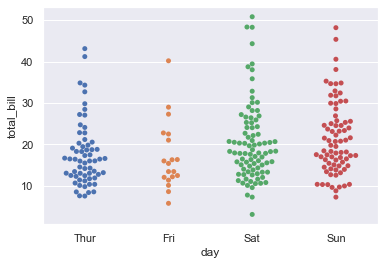

In [55]:
# It spreads it out on the x axis
sns.swarmplot(x='day',y='total_bill',data=tips)

C:\Users\RSanchez\Anaconda3\lib\site-packages\seaborn\categorical.py:2999: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='day', ylabel='total_bill'>

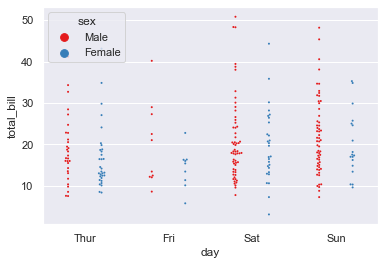

In [58]:
sns.swarmplot(x='day',y='total_bill',data=tips,hue='sex',split=True,palette='Set1',size=2)

### Combining Categorical Plots

<AxesSubplot:xlabel='tip', ylabel='day'>

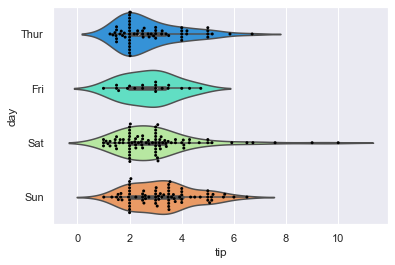

In [61]:
sns.violinplot(x='tip', y='day',data=tips,palette='rainbow')
sns.swarmplot(x='tip', y='day',data=tips,color='black',size=3)

## factorplot - catplot
factorplot is the most general form of a categorical plot. It can take in a **kind** parameter to adjust the plot type:

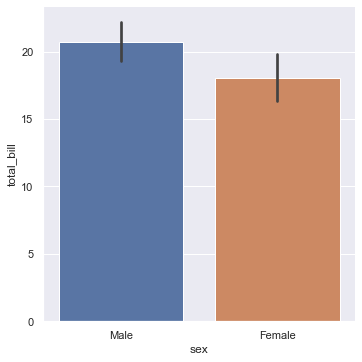

In [63]:
# Takes any type of para to adjust the plot type
# 
sns.catplot(x='sex', y='total_bill', data=tips, kind='bar')

# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

In [65]:
# Load the flights dataset
# we can do a bunch of graphs that show us good stats
flights = sns.load_dataset('flights')


In [66]:
# display the first 5 rows of the flights data
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [67]:
# Create a matrix form for correlation data using the tips dataset
# How to do corrolation with the tips dataset
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

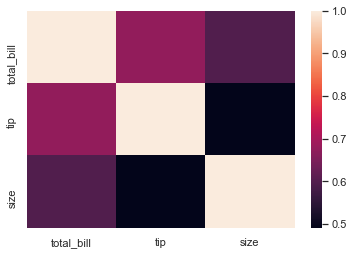

In [68]:
sns.heatmap(tips.corr())

<AxesSubplot:>

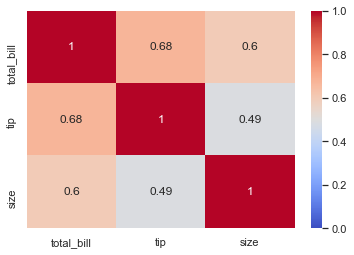

In [70]:
sns.heatmap(tips.corr(), cmap='coolwarm',annot=True,vmin=0)

Or for the flights data:

In [74]:
pvflights = flights.pivot(values='passengers',index='month',columns='year')
pvflights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

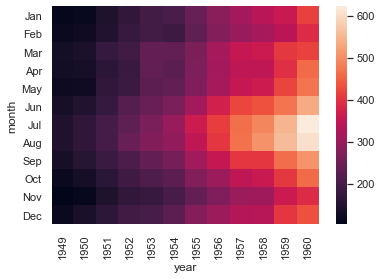

In [73]:
sns.heatmap(pvflights)
# not every graph will not allow you to use a pivot table!

<AxesSubplot:xlabel='year', ylabel='month'>

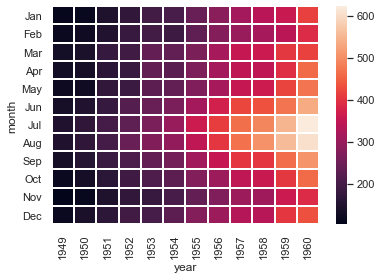

In [75]:
sns.heatmap(pvflights, linecolor='white', linewidth=1)

## clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap. For example:

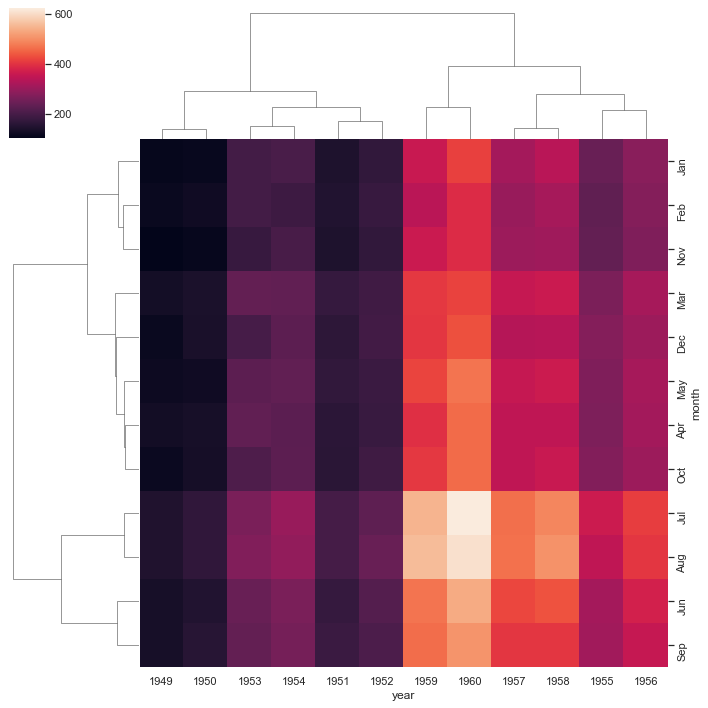

In [76]:
# They are other types of maps that are built into this called ...
# They are used for cluster analysis
sns.clustermap(pvflights)

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months)

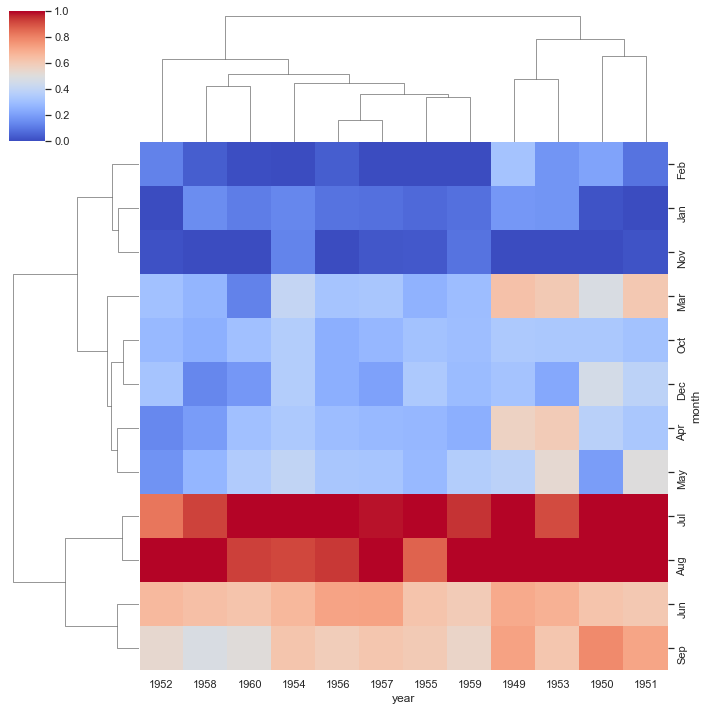

In [77]:
# More options to get the information a little clearer like normalization
sns.clustermap(pvflights,cmap='coolwarm', standard_scale=1)

# Grids

Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

In [80]:
# https://www.tableau.com/solutions/gallery/visual-vocabulary
# Load iris dataset
iris = sns.load_dataset('iris')

In [79]:
# display the first 5 rows of the iris dataset
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## PairGrid

Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.<br>
[documentation](https://seaborn.pydata.org/generated/seaborn.PairGrid.html)

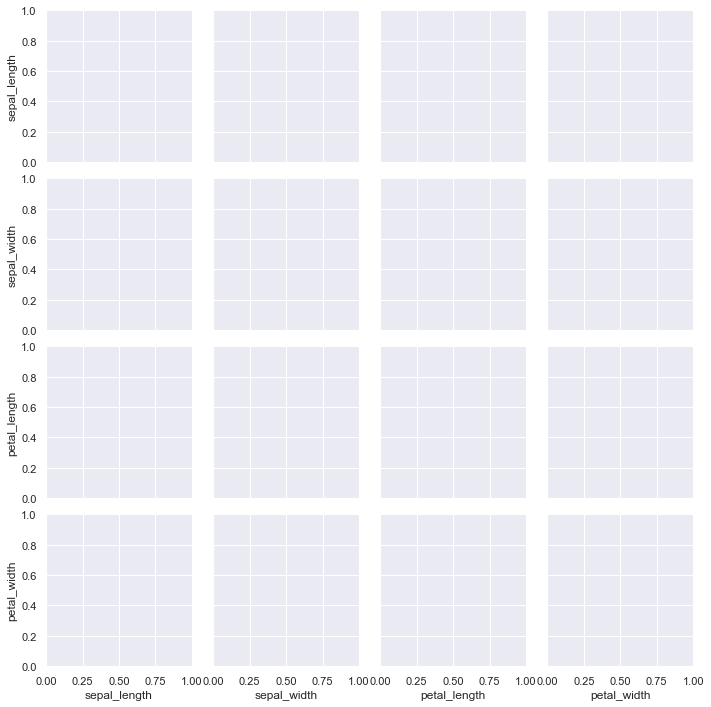

In [82]:
# Just the Grid
sns.PairGrid(iris)

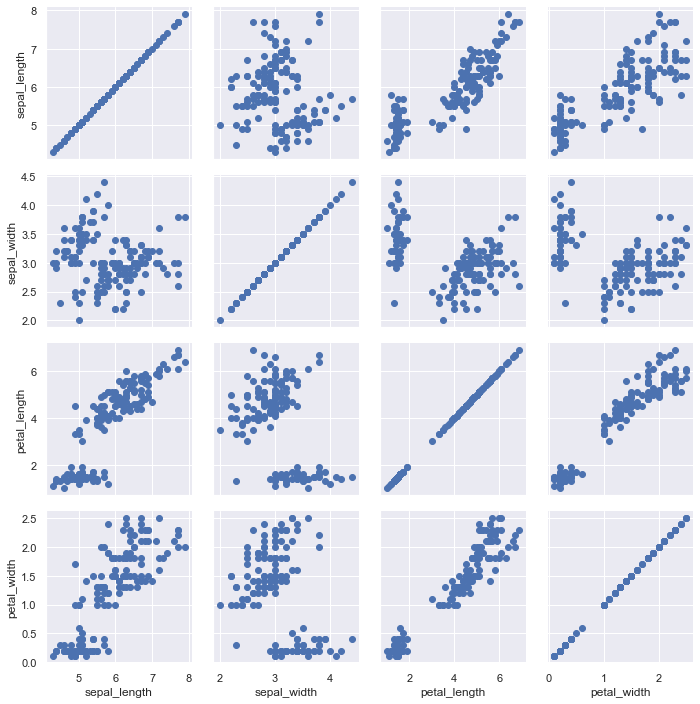

In [83]:
# Then you map to the grid
g = sns.PairGrid(iris)
g.map(plt.scatter)

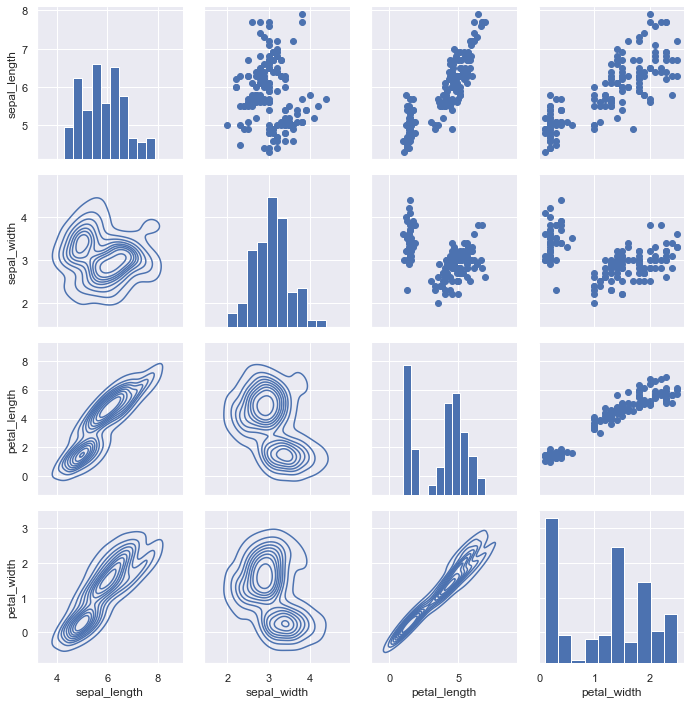

In [85]:
# Map to upper,lower, and diagonal
# Then you map to the grid
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## Facet Grid

FacetGrid is the general way to create grids of plots based off of a feature:<br>
[documentation](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

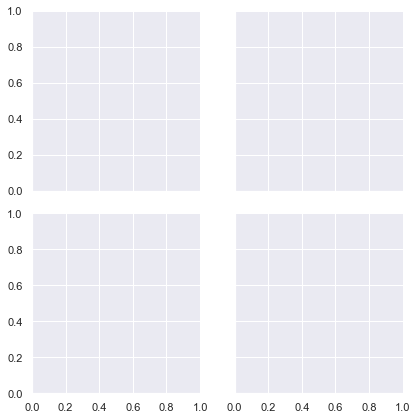

In [86]:
# Just the Grid
# Is also another way to do the grids
sns.FacetGrid(tips, col='time',row='smoker')

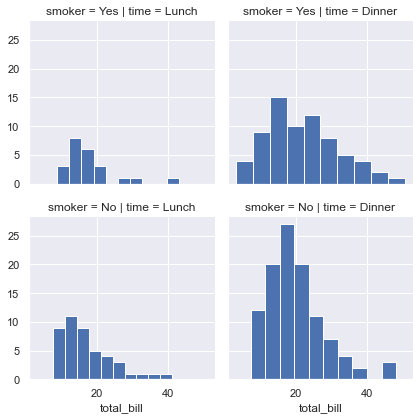

In [88]:
g = sns.FacetGrid(tips, col='time',row='smoker')
g = g.map(plt.hist, 'total_bill')

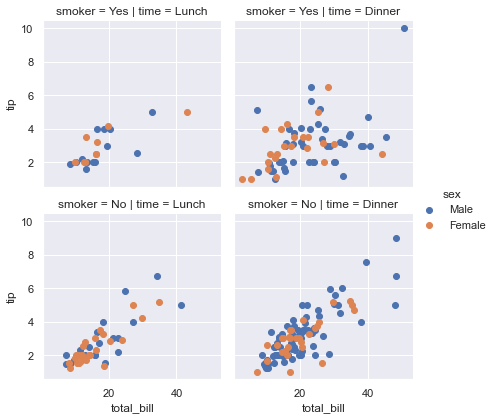

In [92]:
g = sns.FacetGrid(tips,col='time',row='smoker',hue='sex')
g = g.map(plt.scatter, 'total_bill','tip').add_legend()

## JointGrid

JointGrid is the general version for jointplot() type grids, for a quick example:<br>
[documentation](https://seaborn.pydata.org/generated/seaborn.JointGrid.html)

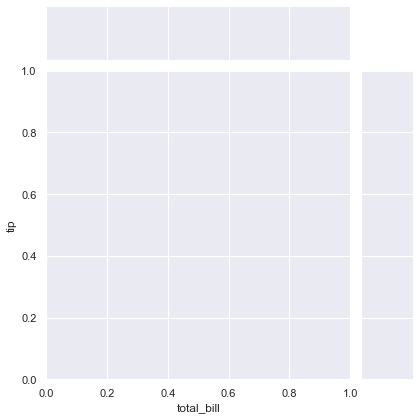

In [93]:
sns.JointGrid(x='total_bill', y= 'tip', data=tips)

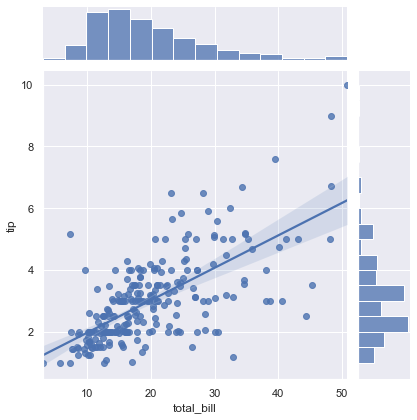

In [94]:
# Regression scatter plot with histogram
g = sns.JointGrid(x='total_bill', y= 'tip', data=tips)
g = g.plot(sns.regplot,sns.histplot)

# Regression Plots

Seaborn has many built-in capabilities for regression plots, however we won't really discuss regression until the machine learning section of the course, so we will only cover the **lmplot()** function for now.

**lmplot** allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

Let's explore how this works:

## Implot()

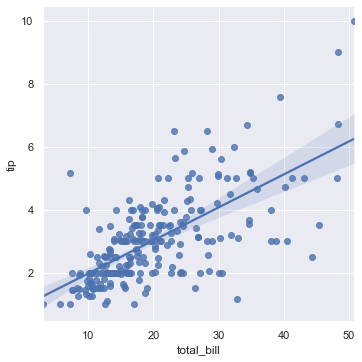

In [95]:
sns.lmplot(x='total_bill', y= 'tip', data=tips)

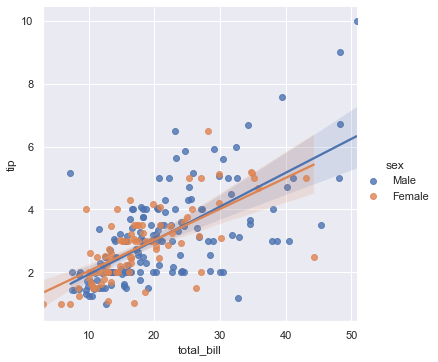

In [96]:
sns.lmplot(x='total_bill', y= 'tip', data=tips, hue='sex')

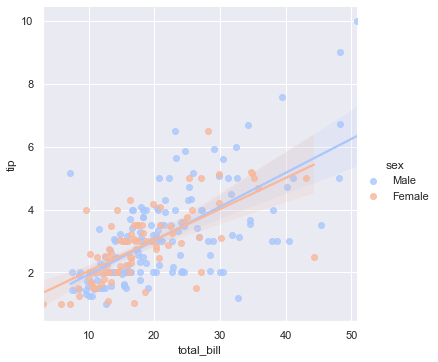

In [97]:
sns.lmplot(x='total_bill', y= 'tip', data=tips, hue='sex', palette='coolwarm')

### Working with Markers

lmplot kwargs get passed through to **regplot** which is a more general form of lmplot(). regplot has a scatter_kws parameter that gets passed to plt.scatter. So you want to set the s parameter in that dictionary, which corresponds (a bit confusingly) to the squared markersize. In other words you end up passing a dictionary with the base matplotlib arguments, in this case, s for size of a scatter plot. In general, you probably won't remember this off the top of your head, but instead reference the documentation.

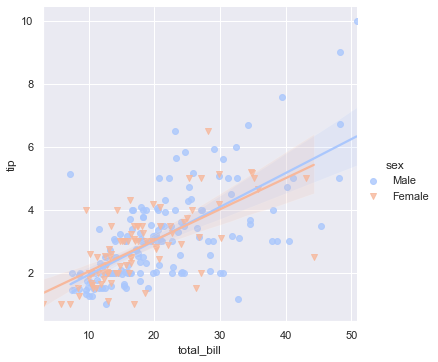

In [98]:
sns.lmplot(x='total_bill', y= 'tip', data=tips, hue='sex', palette='coolwarm'
          , markers=['o','v'])
# For circles pass the 'o' and for triangles you pass the 'v'

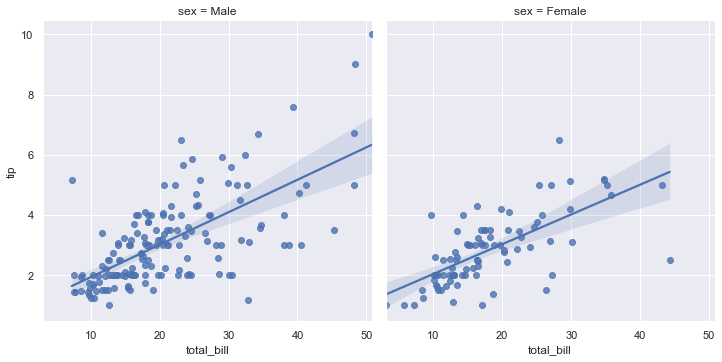

In [101]:
sns.lmplot(x='total_bill',y='tip', data=tips, col='sex')

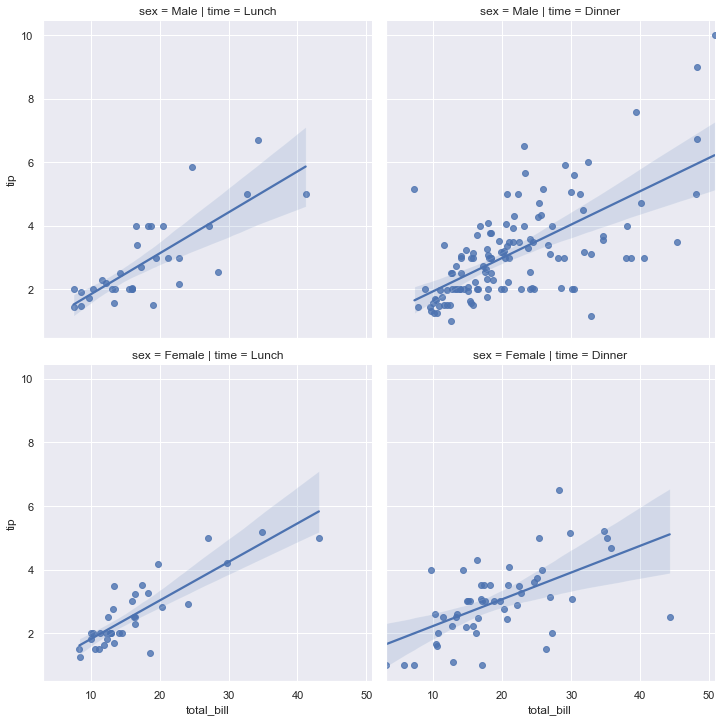

In [102]:
sns.lmplot(x='total_bill',y='tip', data=tips, col='time', row='sex')

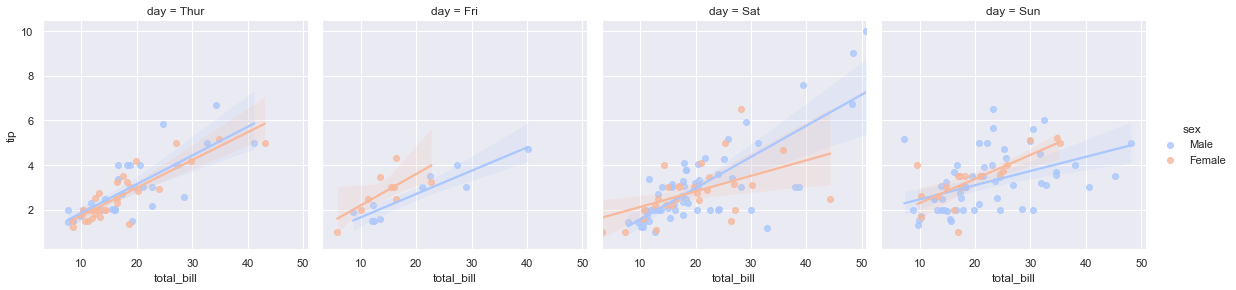

In [104]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day', hue='sex', palette='coolwarm', height=4)

## Aspect and Size

Seaborn figures can have their size and aspect ratio adjusted with the **size** and **aspect** parameters:

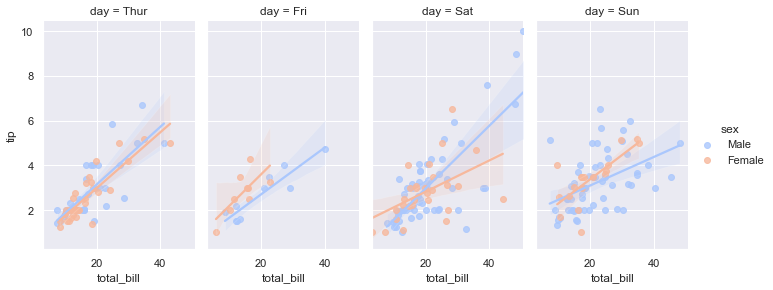

In [106]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day', hue='sex', palette='coolwarm', height=4, aspect=.6)

# Style and Color

We've shown a few times how to control figure aesthetics in seaborn, but let's now go over it formally:

## Styles

You can set particular styles:

<AxesSubplot:xlabel='sex', ylabel='count'>

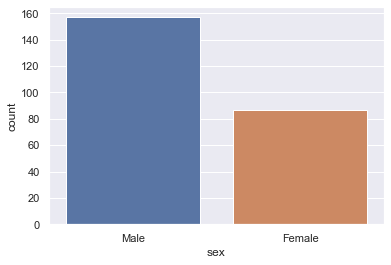

In [107]:
sns.countplot(x='sex',data=tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

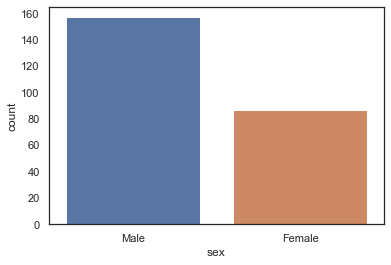

In [108]:
sns.set_style('white')
sns.countplot(x='sex',data=tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

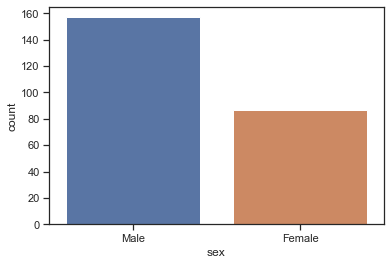

In [109]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)

## Spine Removal

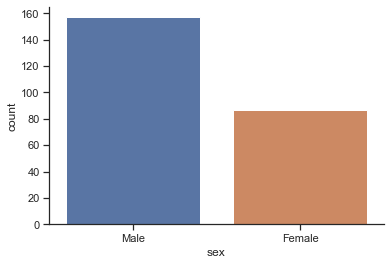

In [110]:
sns.countplot(x='sex',data=tips)
sns.despine()

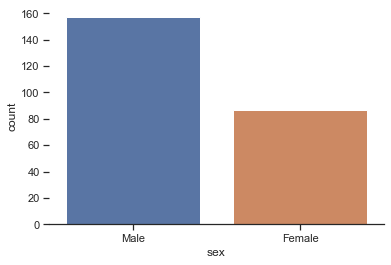

In [111]:
sns.countplot(x='sex',data=tips)
sns.despine(left=True)

You can use matplotlib's **plt.figure(figsize=(width,height) ** to change the size of most seaborn plots.

You can control the size and aspect ratio of most seaborn grid plots by passing in parameters: size, and aspect. For example:

<AxesSubplot:xlabel='sex', ylabel='count'>

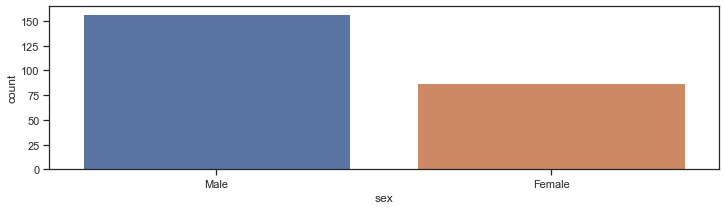

In [113]:
# Non Grid Plot
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

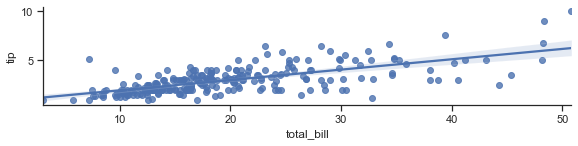

In [116]:
# Grid Type Plot
sns.lmplot(x='total_bill', y='tip', data=tips, aspect=4, height=2)

## Scale and Context

The set_context() allows you to override default parameters:

<AxesSubplot:xlabel='sex', ylabel='count'>

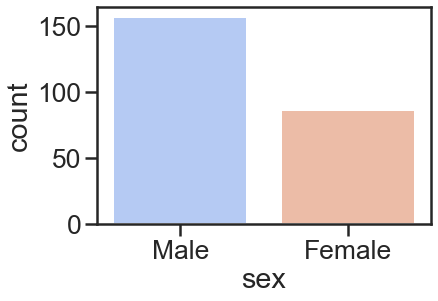

In [117]:
sns.set_context('poster', font_scale=1.2)
sns.countplot(x='sex',data=tips, palette='coolwarm')

Check out the documentation page for more info on these topics:
https://stanford.edu/~mwaskom/software/seaborn/tutorial/aesthetics.html